# 1 - INTRODUCTION / GETTING STARTED

The project started with the idea of ​​practicing predictive models. Like most notebooks that use this database, the objective was to create a satisfactory model to identify fraudulent and non-fraudulent transactions.
However, I ended up focusing only on Logistic Regression, doing several different rounds to study how some types of data manipulation change the model's performance. To be honest, I think the greatest value of this work is in that.

As the database is very unbalanced, I tried to test undersampling the majority class in different ways, in addition to trying to set limits to avoid extreme outliers.

If you want to see only the most satisfactory model, skip to round 6 (which is item 9, the last).

It's a very long notebook because I tried to repeat the steps a lot in case anyone wants to skip a few rounds and still follow my workflow.

There is also a chapter dedicated to exploratory data analysis, which is something I like to do to try to better understand what we are dealing with.


### 1.1 Importing packages and loading data

Note:
I ended up not using everything I imported, but this is the material I usually work with.

In [ ]:
# !pip install imbalanced-learn

In [ ]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
1
# Displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# Data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler

# Metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, \
roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# To deal with warnings
import warnings

# Saving models
import pickle

1.2 Load dataset

In [ ]:
# Load dataset into a dataframe
df0 = pd.read_csv("creditcard.csv")

# Display first few rows of the dataframe
df0.head(4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0


# **2 - EXPLORATORY DATA ANALYSIS**


### 2.1 Getting familiar with the dataset

It seems that all columns went through some type of encoding, with three exceptions: Time, Amount and Class.
While Amount and Class are crystal clear (Transaction Amount and Not Fraud (0) and Fraud (1), I had to go back to Kaggle to find more information about Time. It is the distance, in seconds, between the transaction in question and the first transaction in the dataset.

And, of course, every row is a different transaction.

In [ ]:
 # Get an overview of the dataset
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Everything seems to be in order in terms of data types

In [ ]:
# Get descriptive statistics of the columns
df0.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### 2.2 Check duplicates

In [ ]:
# Check duplicates
df0.duplicated().sum()

1081

1081 duplicates were found. That's intriguing. Let's display all ocurrences.

In [ ]:
# Display every instance of duplicate rows (that's why 'keep=False')
duplicates_df = df0[df0.duplicated(keep=False)]
duplicates_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,-0.830603,-1.191774,0.942870,1.372621,-0.037988,-0.208490,0.321883,-0.205951,-0.025225,-0.468427,0.023667,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284190,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,-1.449823,-0.508930,0.600035,-0.627313,1.017499,-0.887384,0.420096,1.856497,1.315099,1.096112,-0.821707,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,-1.449823,-0.508930,0.600035,-0.627313,1.017499,-0.887384,0.420096,1.856497,1.315099,1.096112,-0.821707,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284192,172233.0,-2.691642,3.123168,-3.339407,1.017018,-0.293095,-0.167054,-0.745886,2.325616,-1.634651,-1.440241,-0.511918,0.607878,-0.627645,1.023032,-0.888334,0.413444,1.860351,1.316597,1.094512,-0.791037,0.402639,0.259746,-0.086606,-0.097597,0.083693,-0.453584,-1.205466,-0.213020,36.74,0


In [ ]:
# # Calculate the percentage of duplicated data
percentage_duplicates = df0.duplicated(keep=False).sum() / len(df0) * 100

# Print the outcome
print(f"The percentage of duplicate rows in the DataFrame is {percentage_duplicates}%")

The percentage of duplicate rows in the DataFrame is 0.6509671461726713%


Less than 1% of the data is made of duplicates, but the dataframe above shows that some of them are in subsequent lines, which is strange.

I don't have much knowledge about fraud, and I thought that some of these subsequent values might be illegitimate, but I remembered the Time column: could a fraudulent transaction be made at exactly the same time as the original transaction?

It seems to me that it was some kind of input error, or they simply copied these values to populate the database further.

Ideally, I would talk to a member of another team to investigate the reason for these values. But since I'm doing this just for practice, I'm going to leave them all here.

2.3 - Discard the columns that won't be used in this first moment

The columns V1-V28 don't say anything, unfortunately. Let's drop them and create a new dataframe with only the columns we understand, but let's keep the original just in case.

In [ ]:
# Create a subset of the dataframe with only Time, Amount and Class. Call it df1
df1 = df0[["Time","Amount","Class"]]

# Display the first three rows
df1.head(3)

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0


### 2.3 Check missing values

In [ ]:
# Check if there are missing values
df1.isna().sum()

Time      0
Amount    0
Class     0
dtype: int64

No missing values.

### 2.4 Exploring variables

Let's take a look at the Class feature, which is the one that interests us most.

In [ ]:
# Check the distribution of Class
df1["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This column is highly imbalanced.
Now let's see this distribution in percentage, and also plot a graph to visualize the difference between the values.

In [ ]:
# Get the percentage of legitimate transactions and fraud, save the result as Percentages
percentages = df1["Class"].value_counts(normalize=True) * 100

# Display
percentages

0    99.827251
1     0.172749
Name: Class, dtype: float64

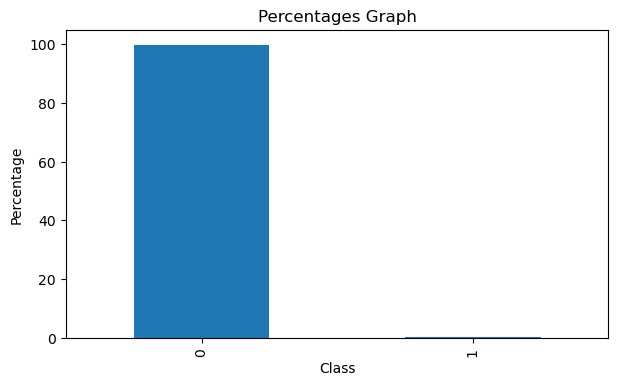

In [ ]:
# Create a new figure and set width and height) in inches
plt.figure(figsize=(7, 4))

# Plot a bar graph for the percentages
percentages.plot(kind='bar'
                )
# Set title and labels
plt.title('Percentages Graph')
plt.xlabel('Class')
plt.ylabel('Percentage')

# Display
plt.show()

Class is highly imbalanced, which can impact models.

Before trying them, let's look at the classes separately to compare them with the entire database. The objective is to check if there is any interesting curiosity.

First, create two subsets - not fraud and fraud.

In [ ]:
# Create a subset of D1 with only legitimate transactions (not fraud) and call it df1_not_fraud

df1_not_fraud = df1.loc[df1["Class"] == 0, ["Time", "Amount"]]

# Display the first rows
# df1_not_fraud.head(3)

# Create a subset of D1 with only fraudulent transactions and call it df1_fraud

df1_fraud = df1.loc[df1["Class"] == 1, ["Time", "Amount"]]

# Display the first rows
# df1_fraud.head(3)

Now let's compare their descriptive statistics.

In [ ]:
# Print the statistics of the whole database (df1)
print("Entire database values \n-----------------------------------")
print(df1[["Time","Amount"]].describe())

# Print the statistics of the legitimate transactions (df1_not_fraud)
print("\nLegit transaction values \n-----------------------------------")
print(df1_not_fraud[["Time","Amount"]].describe())

# Print the statistics of the fraudlent transactions (df1)fraud)
print("\nFraudulent transaction values \n-----------------------------------")
print(df1_fraud[["Time","Amount"]].describe())


Entire database values 
-----------------------------------
                Time         Amount
count  284807.000000  284807.000000
mean    94813.859575      88.349619
std     47488.145955     250.120109
min         0.000000       0.000000
25%     54201.500000       5.600000
50%     84692.000000      22.000000
75%    139320.500000      77.165000
max    172792.000000   25691.160000

Legit transaction values 
-----------------------------------
                Time         Amount
count  284315.000000  284315.000000
mean    94838.202258      88.291022
std     47484.015786     250.105092
min         0.000000       0.000000
25%     54230.000000       5.650000
50%     84711.000000      22.000000
75%    139333.000000      77.050000
max    172792.000000   25691.160000

Fraudulent transaction values 
-----------------------------------
                Time       Amount
count     492.000000   492.000000
mean    80746.806911   122.211321
std     47835.365138   256.683288
min       406.000000     

The values for the Time column do not vary much. Most notable insights: the average time for fraudulent transactions is slightly shorter. The minimum time for fraudulent actions is 406, while for non-fraudulent actions it is zero. So the first transaction is never fraudulent.

The comparison between the Amount descriptive statistics of the two subsets is more interesting.

The average number of fraudulent transactions is around 38% higher than that of legitimate ones (122 and 88, respectively).

However, the minimum value for fraud is zero. In other words, there are transactions that were categorized as fraud even though they were null. This appears to be some kind of error. Again, the ideal would be to talk to professionals from other areas to try to understand what happened here.

# 3 - VISUALIZATIONS



### 3.1 - Exploring visualizations for more findings.

Just seeing the descriptive values was a great help, but sometimes visualizations make some aspects of the data more evident.

View the differences in the Amount column between fraud and non-fraud:

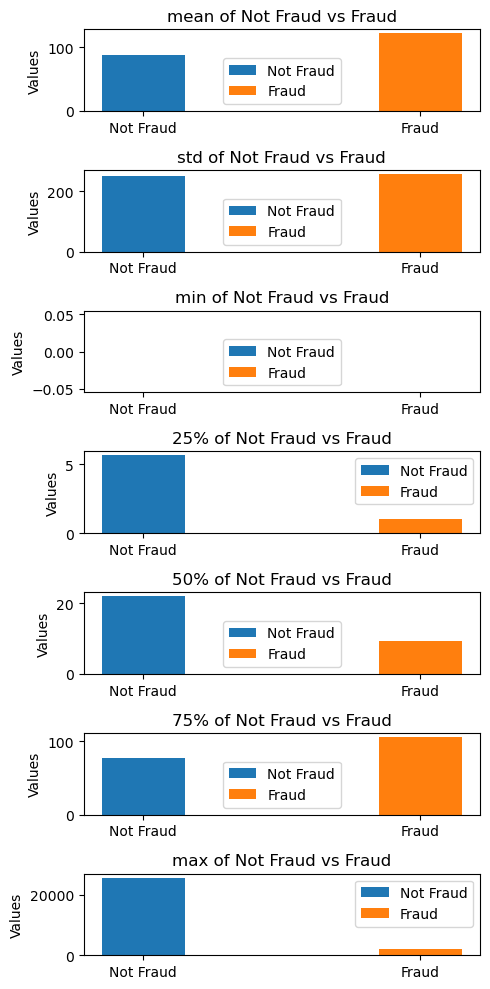

In [ ]:
# Save just the Amount stats
not_fraud_amount = df1_not_fraud["Amount"].describe()
fraud_amount = df1_fraud["Amount"].describe()

# Create a list with the stats names
stats = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']

# Create an x location for each bar
x = np.arange(len(stats))

# Set bar width
bar_width = 0.30

# Create a figure and a set of subplots
fig, axs = plt.subplots(nrows=len(stats), ncols=1, figsize=(5, 10))

# Loop over stats and create one two bars (Not Fraud value and Fraud value)
for i, stat in enumerate(stats):

    # Plot bars for not_fraud_amount
    axs[i].bar(1, not_fraud_amount.loc[stat], bar_width, label='Not Fraud')

    # Plot bars for fraud_amount
    axs[i].bar(2, fraud_amount.loc[stat], bar_width, label='Fraud')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    axs[i].set_ylabel('Values')
    axs[i].set_title(f'{stat} of Not Fraud vs Fraud')
    axs[i].set_xticks([1, 2])
    axs[i].set_xticklabels(['Not Fraud', 'Fraud'])
    axs[i].legend()

fig.tight_layout()
plt.show()

The highest fraudulent value is not even close to half of the highest non-fraud value.

### 3.2 Visualize outliers

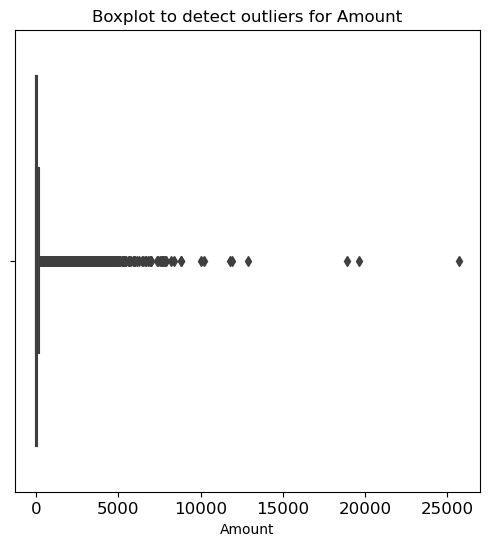

In [ ]:
# Create a boxplot to visualize distribution of 'Amount' and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for Amount', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['Amount'])
plt.show()

Most of the reviews are clustered in the low end. But there are definetely lots outliers and also extreme outliers.

A small detour to understand how significant these outliers are:

In [ ]:
# Determine the number of rows containing outliers

# Compute the 25th percentile value in 'reviews'
percentile25 = df1['Amount'].quantile(0.25)

# Compute the 75th percentile value in 'reviews'
percentile75 = df1['Amount'].quantile(0.75)

# Compute the interquartile range in 'reviews'
iqr = percentile75 - percentile25

# Define upper limit and lower limit for non-outlier values in 'reviews'
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in 'Amount'
outliers = df1[(df1['Amount'] > upper_limit) | (df1['Amount'] < lower_limit)]

# Count how many rows in the data contain outliers in 'Amount'
print("Number of rows in the data containing outliers in 'Amount:", len(outliers))

# Calculate the percent of 'Amount' outliers in df1
print(f"Percentage of 'Amount' outliers in df: {len(outliers)/len(df1)*100}%")



Lower limit: -101.7475
Upper limit: 184.5125
Number of rows in the data containing outliers in 'Amount: 31904
Percentage of 'Amount' outliers in df: 11.201971861646658%


One more time, but now investigating extreme outliers.

In [ ]:
# Determine the number of rows containing outliers

# Compute the 25th percentile value in 'reviews'
percentile25 = df1['Amount'].quantile(0.25)

# Compute the 75th percentile value in 'reviews'
percentile75 = df1['Amount'].quantile(0.75)

# Compute the interquartile range in 'reviews'
iqr = percentile75 - percentile25

# Define upper limit and lower limit for non-outlier values in 'reviews'
upper_limit = percentile75 + 3 * iqr
lower_limit = percentile25 - 3 * iqr

print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing extreme outliers in 'Amount'
extreme_outliers = df1[(df1['Amount'] > upper_limit) | (df1['Amount'] < lower_limit)]

# Count how many rows in the data contain outliers in 'Amount'
print("Number of rows in the data containing extreme outliers in 'Amount:", len(extreme_outliers))

# Calculate the percent of 'Amount' outliers in df1
print(f"Percentage of 'Amount' extreme outliers in df: {len(extreme_outliers)/len(df1)*100}%")

Lower limit: -209.095
Upper limit: 291.86
Number of rows in the data containing extreme outliers in 'Amount: 18941
Percentage of 'Amount' extreme outliers in df: 6.650468562921557%


Now we can visualize if the extreme outliers are mostly fraud or not.

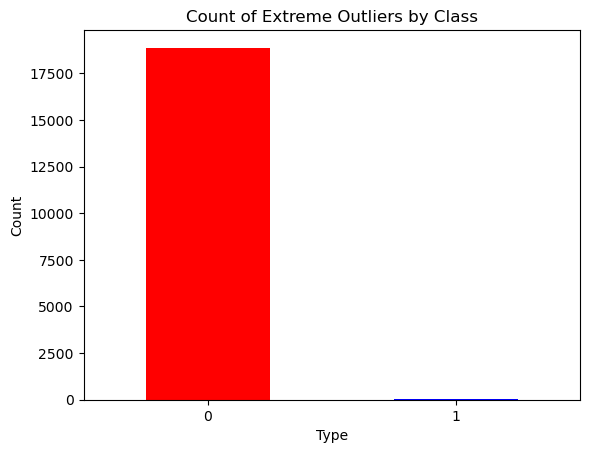

In [ ]:
# Count the number of extreme outliers in each Class
outlier_counts = extreme_outliers['Class'].value_counts()

# Plot the bar chart
outlier_counts.plot(kind='bar', color=['red', 'blue'])
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Extreme Outliers by Class')
plt.xticks(rotation=0)
plt.show()

In fact, the extreme values are in their majority classified as non-fraud. It's even difficult to see the fraudulent ones. Let's print the results to make them clear.

In [ ]:
outlier_counts

0    18876
1       65
Name: Class, dtype: int64

In [ ]:
print(18876/65)

290.4


It just confirms that fraudulent values are usually not very high: the amount of non-fraudulent extreme outliers is 290 times bigger than frauds.

Just for precaution, let's see if there are extreme outliers in 'Time' and, in case there are, visualize them.

In [ ]:
# Determine the number of rows containing outliers

# Compute the 25th percentile value in 'reviews'
percentile25 = df1['Time'].quantile(0.25)

# Compute the 75th percentile value in 'reviews'
percentile75 = df1['Time'].quantile(0.75)

# Compute the interquartile range in 'reviews'
iqr = percentile75 - percentile25

# Define upper limit and lower limit for non-outlier values in 'reviews'
upper_limit = percentile75 + 3 * iqr
lower_limit = percentile25 - 3 * iqr

print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing extreme outliers in 'Time'
extreme_outliers = df1[(df1['Time'] > upper_limit) | (df1['Time'] < lower_limit)]

# Count how many rows in the data contain outliers in 'Time'
print("Number of rows in the data containing extreme outliers in 'Time:", len(extreme_outliers))

# Calculate the percentage of 'Time' outliers in df1
print(f"Percentage of 'Time' extreme outliers in df: {len(extreme_outliers)/len(df1)*100}%")

Lower limit: -201155.5
Upper limit: 394677.5
Number of rows in the data containing extreme outliers in 'Time: 0
Percentage of 'Time' extreme outliers in df: 0.0%


It looks like 'Time' won't be an issue.

# 4 - LOGISTIC REGRESSION - First round (two columns)

Logistic regression is usually a good choice for binary classification.

### 4.1 Check assupmtions for logistic regression model

In theory, a few assumptions must be met if we want to build a good model:

• Independent observations: Let's assume this is not a problem.

• Little to no multicollinearity among X predictors? We are only using two predictors (Amount and Time), but let's check them.

In [ ]:
# Check correlation between Amount and Time
correlation = df1[['Amount', 'Time']].corr()
print(correlation)

          Amount      Time
Amount  1.000000 -0.010596
Time   -0.010596  1.000000


Almost no linear relationship.

The other assumptions are:

• Linear relationship between X and the logit of y: We'll go back to this when the model is
ready.

• No extreme outliers: This is a problem, but let's try one run before trying anything else.

### 4.2 Preparing data

Assign predictor variables (X) and target (y).

In [ ]:
 # Isolate the predictors and call them X
X = df1[["Time","Amount"]]

# Isolate the target and call it y
y = df1["Class"]

# Confirm X
# X.head(1)
# Confirm y
# y.head(1)

Since Time and Amount have different ranges, let's scale them.
Logistic Regression models converge faster and perform better with scaled data. StandardScaler will do the trick.

In [ ]:
# Create the scaler
scaler=StandardScaler()

# Scale the predictors (Time and Amount)
X_scaled = scaler.fit_transform(X)

Time to confirm changes. Compare X and X_scaled

Save the X_scaled (a numPy array) into a df (X_scaled_df)

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled, columns=["Time", "Amount"])
print("X")
print(X.head(3))
print("--------------------")
print("X_scaled")
print(X_scaled_df.head(3))

X
   Time  Amount
0   0.0  149.62
1   0.0    2.69
2   1.0  378.66
--------------------
X_scaled
       Time    Amount
0 -1.996583  0.244964
1 -1.996583 -0.342475
2 -1.996562  1.160686


### 4.3 Building the model

Split the data into test and train sets and use the stratify parameter to be sure that the
minority class (1) are in both sets in the right proportion (as in the complete dataset).

random_state=15 for reproducibility purposes.
Using X_scaled_df instead of X (X would be the usual)

In [ ]:
# Perform the train-test split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, stratify=y,test_size=0.25, random_state=15)

Construct a logistic regression model and fit it to the training dataset

In [ ]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=15, max_iter=300).fit(X_train, y_train)



In [ ]:
# Additional evaluation
#Create a series whose index are the predictors and the values are their coefficients
pd.Series(log_clf.coef_[0], index=X.columns)


Time     -0.255039
Amount    0.043200
dtype: float64

### 4.4 A deviation: Check the last assumption

Verify the linear relationship between X and the logit (log odds) of y.

The model’s predict_proba() method is used to generate the probability of response for each sample in
the training data. (The training data is the argument to the method.)

Each row of the array represents one book in X_train. The first column is the probability of not
being fraud, and the second column is the probability of being fraud.

In [ ]:
# Get the predicted probabilities of the training data
training_probabilities = log_clf.predict_proba(X_train)
training_probabilities

array([[0.99817993, 0.00182007],
       [0.99827804, 0.00172196],
       [0.99820248, 0.00179752],
       ...,
       [0.99809696, 0.00190304],
       [0.99814448, 0.00185552],
       [0.99863098, 0.00136902]])

In logistic regression, the relationship between the log-odds (logit) of the dependent variable with
respect to the predictor variable should be linear.
The next blocks of code will help us visualize this relationship

In [ ]:
# Make copy of 'X_train' df and save it as 'logit_data'
logit_data = X_train.copy()

Let's visualize the relationship with Time

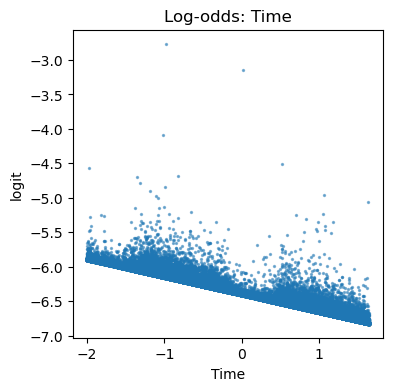

In [ ]:
# Create a 'logit' column in the 'logit_data' df
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

# Set the figure size
plt.figure(figsize=(4, 4))

# Plot regplot of 'Time' log-odds
sns.regplot(x='Time', y='logit', data=logit_data, scatter_kws={'s': 2,'alpha':0.5})
plt.title('Log-odds: Time')

# Display
plt.show()

And now let's see Amount

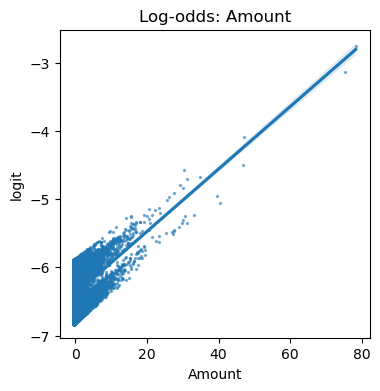

In [ ]:
# Set the figure size
plt.figure(figsize=(4, 4))

# Plot regplot of 'Amount' log-odds
sns.regplot(x='Amount', y='logit', data=logit_data, scatter_kws={'s': 2,'alpha':0.5})
plt.title('Log-odds: Amount')

# Display
plt.show()

They look linear.

### 4.5 Results and Model Evaluation

Make predictions on the test data

In [ ]:
# Make predictions using the test data
y_pred = log_clf.predict(X_test)

In [ ]:
 # Check the model accuracy (data points correctly predicted) on the test data
log_clf.score(X_test, y_test)

0.9982725204348193

99.8 is too good to be true: it's probably misleading because the dataset is imbalanced.

Let's create a Confusion Matrix to visualize the True Positives, True Negatives, False
Positives and False Negatives. It will probably be very disappointing.

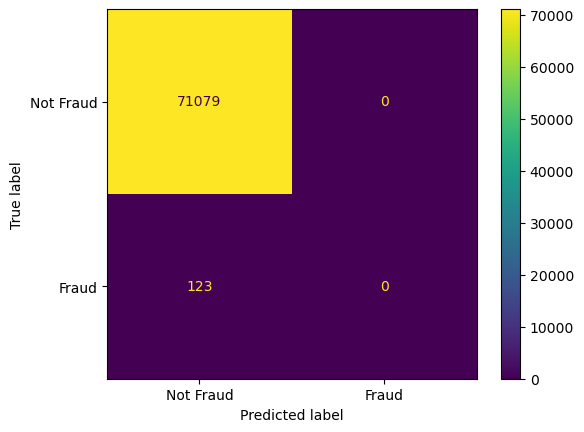

In [ ]:
# Generate a Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# Display the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=['Not Fraud', 'Fraud'])
disp.plot()

Zero True Positives (Bottom right) predicted. Let’s check the value counts again.

In [ ]:
# Check the balance (%)
print(df1['Class'].value_counts(normalize=True))

# Check the ballance in instances
print((df1['Class']).value_counts())

0    0.998273
1    0.001727
Name: Class, dtype: float64
0    284315
1       492
Name: Class, dtype: int64


The value_counts of Class is equal to the Accuracy. The
model is making predictions based solely on the majority class (the most frequent class).

### 4.6 Evaluating the Logistic Regression Model

Let's create a classification report, a performance evaluation metric that gives us the
following.

Precision: correct positive predictions relative to total positive predictions.

Recall: correct positive predictions relative to total actual positives.

F1-score: A weighted harmonic mean of precision and recall.

Support: The number of instances in each class.

In [ ]:
target_labels = ['Not Fraud', 'Fraud']
print(classification_report(y_test, y_pred, target_names=target_labels))


              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     71079
       Fraud       0.00      0.00      0.00       123

    accuracy                           1.00     71202
   macro avg       0.50      0.50      0.50     71202
weighted avg       1.00      1.00      1.00     71202



C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Setting zero division to 1 would artificially inflate the model. Let's skip this.

Anyway, since the goal was to correctly predict Fraud, this is not a model to rely on. I doubt that the outliers are the ones responsible for the poor performance, but if everything goes wrong, maybe it will worth a try in a different round.

# 5 - LOGISTIC REGRESSION - Second Round - Modeling with all columns

In the previous round, only Amount and Time were used as predictors. I didn't want to use features that are not crystal clear, but the model was very disappointing. For the next round, all features will participate. The extreme outliers will still be untouched.



### 5.1 Preparing data

Same approach, but with all columns and ignoring the outliers.

In [ ]:
# Copy the df0 and save it as df2
df2= df0.copy()

# Isolate the predictors and call them X
X = df2.drop('Class',axis=1)

# Isolate the target and call it y
y = df2["Class"]

# Display first two rows
print(X.head(2))


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   

   Amount  
0  149.62  
1    2.69  


### 5.2 Check multicollinearity

This is one of the assumptions for a good LR model. It means that the predictor variables should not be highly correlated with each other.

Over 20 columns were encoded and I have no idea in what context or how this was done. So checking the correlation won't even make sense, but, just for the sake of practice, let's visualize it.


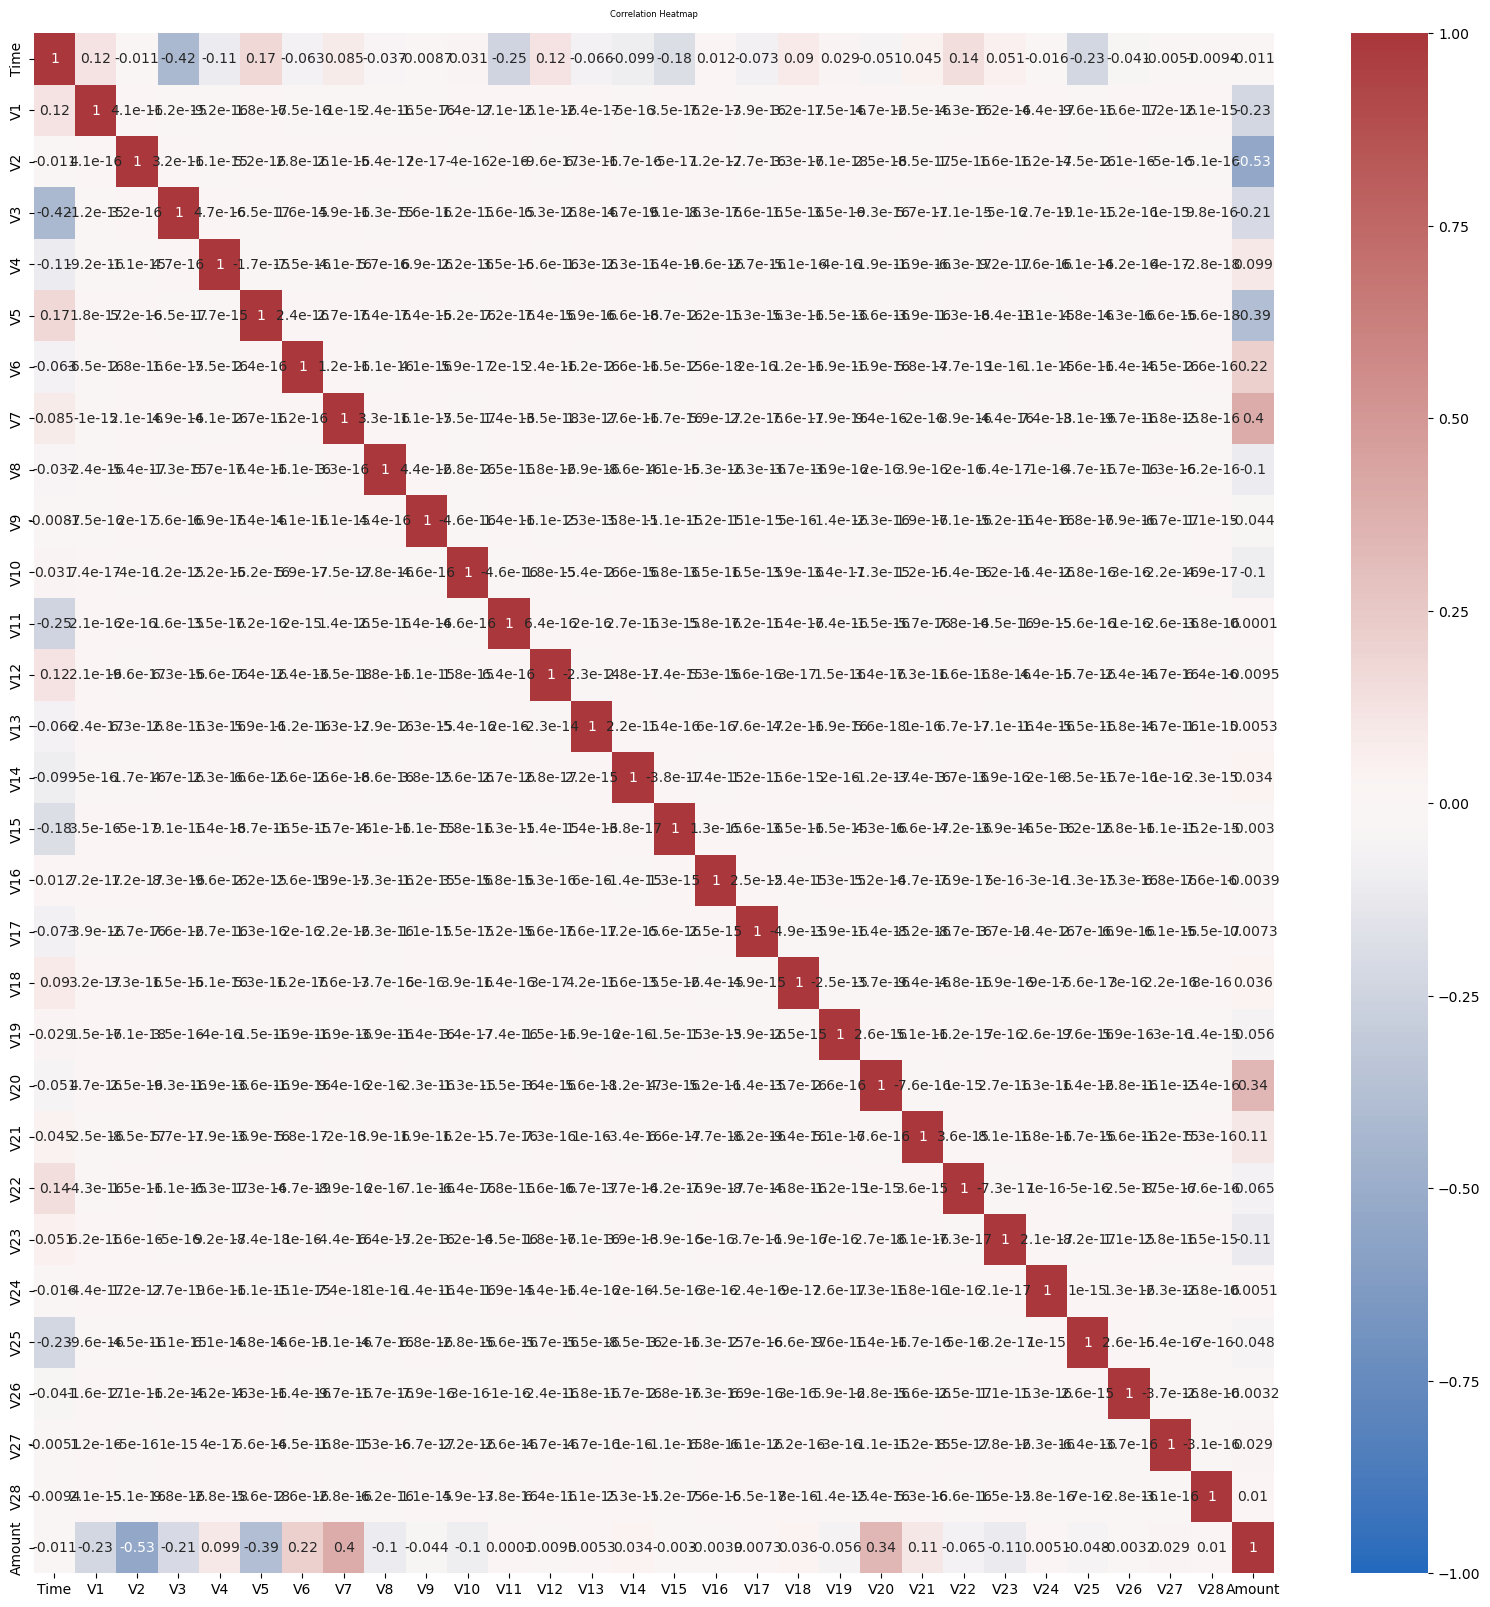

In [ ]:
# Check correlation between the predictors
correlation = X.corr()

# Plot a heatmap of correlation
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':6}, pad=12);
plt.show()


That's not the cleanest map, but based on the colors it's possible to see that there is no strong correlation. Two pairs have moderate correlation (0.4 and 0.34), but we have a lot of predictors.

In [ ]:
# Create the scaler
scaler=StandardScaler()

# Scale the predictors
X_scaled = scaler.fit_transform(X)

### 5.3 Building the model

In [ ]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y,test_size=0.25, random_state=15)

In [ ]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=15, max_iter=300).fit(X_train, y_train)

In [ ]:
# Make predictions using the test data
y_pred = log_clf.predict(X_test)

In [ ]:
target_labels = ['Not Fraud', 'Fraud']
print(classification_report(y_test, y_pred, target_names=target_labels))


              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     71079
       Fraud       0.86      0.59      0.70       123

    accuracy                           1.00     71202
   macro avg       0.93      0.80      0.85     71202
weighted avg       1.00      1.00      1.00     71202



It looks better than the previous model. Lesson? Try the most obvious things (all columns) first.

That being said, we probably can improve it.

# 6 - LOGISTIC REGRESSION - Third Round (all columns - avoiding extreme outliers)

Let's try a third round, this time dealing with the extreme outliers

### 6.1 - Preparing data and dealing with extreme outliers

We already know that Amount has some extreme values, but let's check them again using a new df (df3), the one that we will modify in a future step.

In [ ]:
# Copy the df0 and save it as df3
df3= df0.copy()

# Determine the number of rows containing outliers

# Compute the 25th percentile value in 'reviews'
percentile25 = df3['Amount'].quantile(0.25)

# Compute the 75th percentile value in 'reviews'
percentile75 = df3['Amount'].quantile(0.75)

# Compute the interquartile range in 'reviews'
iqr = percentile75 - percentile25

# Define upper limit and lower limit for non-outlier values in 'reviews'
upper_limit = percentile75 + 3 * iqr
lower_limit = percentile25 - 3 * iqr

print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing extreme outliers in 'Amount'
extreme_outliers = df3[(df3['Amount'] > upper_limit) | (df3['Amount'] < lower_limit)]

# Count how many rows in the data contain outliers in 'Amount'
print("Number of rows in the data containing extreme outliers in 'Amount:", len(extreme_outliers))

# Calculate the percent of 'Amount' outliers in df3
print(f"Percentage of 'Amount' extreme outliers in df: {len(extreme_outliers)/len(df3)*100}%")

Lower limit: -209.095
Upper limit: 291.86
Number of rows in the data containing extreme outliers in 'Amount: 18941
Percentage of 'Amount' extreme outliers in df: 6.650468562921557%


In [ ]:
# Check descriptive statistics
df3['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

We can eliminate the 6.65 percentage of extreme outliers setting a threshold and replacing the values with that threshold.

In [ ]:
# Impute outliers
# 100 - 6.65 = 09335

# Set a threshold
threshold = df3['Amount'].quantile(0.9335)
# Replace values above the 93.35 percentile with the threshold
df3.loc[df3['Amount'] > threshold, 'Amount'] = threshold

# Check again
df3['Amount'].describe()

count    284807.000000
mean         60.958394
std          84.119572
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max         291.880000
Name: Amount, dtype: float64

The maximum value is way way lower now.
Continue preparing the dataset.

In [ ]:
 # Isolate the predictors and call them X
X = df3.drop('Class',axis=1)

# Isolate the target and call it y
y = df3["Class"]

# Scale the predictors
X_scaled = scaler.fit_transform(X)

### 6.2 Building the model
Now we can create the model, make predictions using the test data and run a classification report

In [ ]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y,test_size=0.25, random_state=15)

In [ ]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=15, max_iter=300).fit(X_train, y_train)

In [ ]:
# Make predictions using the test data
y_pred = log_clf.predict(X_test)

In [ ]:
target_labels = ['Not Fraud', 'Fraud']
print(classification_report(y_test, y_pred, target_names=target_labels))


              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     71079
       Fraud       0.87      0.60      0.71       123

    accuracy                           1.00     71202
   macro avg       0.93      0.80      0.86     71202
weighted avg       1.00      1.00      1.00     71202



Precision, recall and f1 increased 1 decimal point.
Excluding the extreme outliers didn’t drastically affect the model’s performance.
That's a bit disappointing, but it still is our best model so far.

Next is step is to generate and visualize a Confusion Matrix.

scikit-learn uses the distribution of a Confusion Matrix like this:

TRUE NEGATIVES  -------- FALSE POSITIVES

FALSE NEGATIVES -------- TRUE POSITIVES

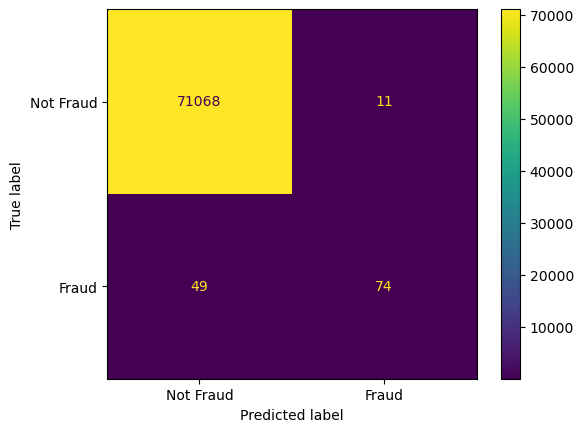

In [ ]:
# Generate a Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=['Not Fraud', 'Fraud'])
disp.plot()

# 7 - LOGISTIC REGRESSION - Fourth round (all columns, undersampling with RUS and no outliers)

For this fourth round, we are gonna keep using the dataframe without extreme outliers (df3), but will also try one more measure to try and improve our results: automatically undersampling the negative class with RandomUnderSampler (RUS).


Since it is basically the same procedure than the last model, it's ok to use the same data - already scaled the with no extreme outliers.


### 7.1 Undersampling

RandomUnderSampler is part of the library imbalanced-learn (I had to pip install it). The subset size it returns is determined by the number of instances in the minority class

In [ ]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y,test_size=0.25, random_state=42)

# Apply random undersampling
rus = RandomUnderSampler(random_state=42)
X_resamp, y_resamp = rus.fit_resample(X_train, y_train)

### 7.2 Building the model
Once we have the training data resampled (balanced), we can continue normally.

In [ ]:
# Train the logistic regression model on the resampled data
log_clf = LogisticRegression(random_state=15, max_iter=300)
log_clf.fit(X_resamp, y_resamp)

# Predict on the test set
y_pred = log_clf.predict(X_test)

In [ ]:
# Evaluate the model
target_labels = ['Not Fraud', 'Fraud']
print(classification_report(y_test, y_pred, target_names=target_labels))


              precision    recall  f1-score   support

   Not Fraud       1.00      0.96      0.98     71079
       Fraud       0.04      0.90      0.08       123

    accuracy                           0.96     71202
   macro avg       0.52      0.93      0.53     71202
weighted avg       1.00      0.96      0.98     71202



This is almost the same results as the very first model. In other words: terrible at predicting fraud!
Maybe too much valuable information was lost with threasholding the extreme outliers and undersampling the majority class. Low precision and high recall mean that the model has a lot of false positives, which might be inconvenient. Let's visualize it.

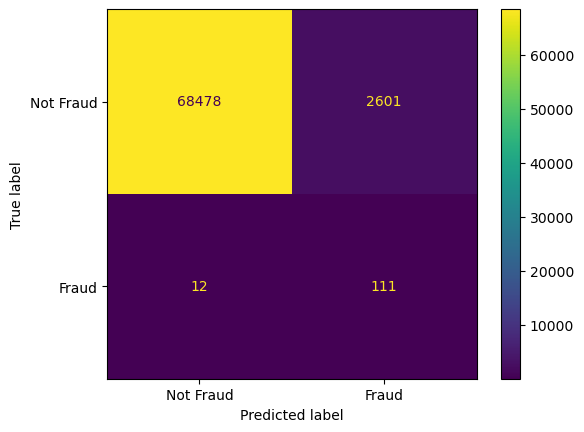

In [ ]:
# Generate a Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=['Not Fraud', 'Fraud'])
disp.plot()


2601 out of 71202 were incorrectly predicted as Fraud: that's what 2601 False Positives mean.

That's 3.65% of the data. It may seem low, but imagine if your credit card gets blocked or doesn't accept a purchase 3% of the time... that's a lot of unconvinience.

# 8 - LOGISTIC REGRESSION - Fifth Round - all columns, manually undersampling, keeping extreme outliers

Let's start again, to avoid getting lost with X or Y variables saved far above.
We'll quickly prepare data again and then try a different way of sampling: instead of using the function RandomUnderSampler, we'll manually undersample the majority class and be sure that we have
equal number of positive and negative samples.


### 8.1 - Preparing data

Begin by getting the unmodified df0, calling it df4 and checking Class distribution.
The goal is to discover the number of instances of the minority class - that's the number we'll use.

In [ ]:
# Save df
df4 = df0.copy()

# Check class balance
df4["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

492. Remember this number.

Now isolate X, y, and scale X, just like we've been doing.

In [ ]:
# Save df
df4 = df0.copy()

# Isolate the predictors and target
X = df4.drop('Class', axis=1)
y = df4['Class']

# Scale the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 8.2 Perform manual undersampling

That's the step that differentiates round 8 and round 7.

In [ ]:
# Perform manual sampling
not_fraud_df = df4[df4['Class'] == 0].sample(n=492, random_state=14)
fraud_df = df4[df4['Class'] == 1] # No need to set 492 here, since the df already contains exactly 492 instances

# Concatenate the two dfs
balanced_dataset = pd.concat([not_fraud_df,fraud_df])

# Check balanace
balanced_dataset["Class"].value_counts()

0    492
1    492
Name: Class, dtype: int64

### 8.3 Building the model

As always, isolate X and Y, then scale the predictors. Lastly, build the model using the balanced and scaled X.

In [ ]:
# Isolate the predictors and target from the balanced data
X_balanced = balanced_dataset.drop('Class', axis=1)
y_balanced = balanced_dataset['Class']

# Scale the predictors
X_balanced_scaled = scaler.fit_transform(X_balanced)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_balanced_scaled, y_balanced, stratify=y_balanced, test_size=0.25, random_state=14)

# Train model
log_clf = LogisticRegression(random_state=15, max_iter=300)
log_clf.fit(X_train, y_train)

# Predict on Test
y_pred = log_clf.predict(X_test)

# Evaluate the model
target_labels = ['Negative', 'Positive']
print(classification_report(y_test, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    Negative       0.94      0.99      0.96       123
    Positive       0.99      0.93      0.96       123

    accuracy                           0.96       246
   macro avg       0.96      0.96      0.96       246
weighted avg       0.96      0.96      0.96       246



Here we go! Somehow this method of undersampling outperforms the RUS, which makes me think I may have done something wrong in round 7.

Anyway, these results are impressive.

Can we make them even better?


# 9 - LOGISTIC REGRESSION - Sixth Round - all columns, manually undersampling, excluding extreme outliers

In the fourth round (which is item 7 actually) I tried mixing undersampling and replacing extreme outliers. It didn't work out. But I was using RandomUnderSampler(), a built-in function, instead of trying to manually undersample the majority class.

Let's try manually now.

### 9.1 Preparing Data

Save a new df, set predictors and target, initiate Scaler.

In [ ]:
# Save df
df5 = df0.copy()

# Isolate the predictors and target
X = df5.drop('Class', axis=1)
y = df5['Class']

# Determine the number of rows containing outliers

# Compute the 25th percentile value in 'reviews'
percentile25 = df5['Amount'].quantile(0.25)

# Compute the 75th percentile value in 'reviews'
percentile75 = df5['Amount'].quantile(0.75)

# Compute the interquartile range in 'reviews'
iqr = percentile75 - percentile25

# Define upper limit and lower limit for non-outlier values in 'reviews'
upper_limit = percentile75 + 3 * iqr
lower_limit = percentile25 - 3 * iqr

print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing extreme outliers in 'Amount'
extreme_outliers = df5[(df5['Amount'] > upper_limit) | (df5['Amount'] < lower_limit)]

# Count how many rows in the data contain outliers in 'Amount'
print("Number of rows in the data containing extreme outliers in 'Amount:", len(extreme_outliers))

# Calculate the percent of 'Amount' outliers in df5
print(f"Percentage of 'Amount' extreme outliers in df: {len(extreme_outliers)/len(df5)*100}%")

Lower limit: -209.095
Upper limit: 291.86
Number of rows in the data containing extreme outliers in 'Amount: 18941
Percentage of 'Amount' extreme outliers in df: 6.650468562921557%


Just like we did last time.
We can eliminate the 6.65 percentage of extreme outliers setting a threshold and replacing the values with that threshold.

In [ ]:
# Impute outliers
# 100 - 6.65 = 09335

# Set a threshold
threshold = df5['Amount'].quantile(0.9335)
# Replace values above the 93.35 percentile with the threshold
df5.loc[df5['Amount'] > threshold, 'Amount'] = threshold

# Check again
df5['Amount'].describe()

count    284807.000000
mean         60.958394
std          84.119572
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max         291.880000
Name: Amount, dtype: float64

### 9.2 Perform manual undersampling

Same procedure as in the last round. A reminder: we only have 492 fraudulent instances in the whole dataset. So that's the number that will be used to balance it.

In [ ]:
# Perform manual sampling
not_fraud_df = df5[df5['Class'] == 0].sample(n=492, random_state=14)
fraud_df = df5[df5['Class'] == 1] # No need to set 492 here, since the df already contains exactly 492 instances

# Concatenate the two dfs
balanced_dataset = pd.concat([not_fraud_df,fraud_df])

# Check balanace
balanced_dataset["Class"].value_counts()

0    492
1    492
Name: Class, dtype: int64

### 9.3 Building the model

Isolate X and Y, then scale the predictors. Lastly, build the model using the balanced and scaled X.


In [ ]:
# Isolate the predictors and target from the balanced data
X_balanced = balanced_dataset.drop('Class', axis=1)
y_balanced = balanced_dataset['Class']

# Initiate scaler
scaler = StandardScaler()
# Scale the predictors
X_balanced_scaled = scaler.fit_transform(X_balanced)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_balanced_scaled, y_balanced, stratify=y_balanced, test_size=0.25, random_state=14)

# Train model
log_clf = LogisticRegression(random_state=15, max_iter=300)
log_clf.fit(X_train, y_train)

# Predict on Test
y_pred = log_clf.predict(X_test)

# Evaluate the model
target_labels = ['Negative', 'Positive']
print(classification_report(y_test, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    Negative       0.94      1.00      0.97       123
    Positive       1.00      0.93      0.97       123

    accuracy                           0.97       246
   macro avg       0.97      0.97      0.97       246
weighted avg       0.97      0.97      0.97       246



It's even better now! Replacing the extreme outliers caused the model's performance to increase by one decimal point in some metrics. I guess we have our winning model! The only thing that bothers me a little bit is the 0.94 precision for the negative class (Not Fraud) - this could still be inconvient. But overall the performance is very good.
And it's time to move on to another project!



### 9.4 Crossvalidation.

As an additional step, we could crossvalidate the models.

I will do that just to this last one, but I'm gonna write a function so the code can be used again easily in the future.

It's time to move on to another project!


Note: Use cv=5, the model will be trained in 4 folds and tested on the remaining fold. This process is repeated 5 times, with each fold being used as the test set once.
Dataset is randomly divided into 5 equal-sized subsets (folds)

In [ ]:
# Define a cross validatation function that accepts as parameters a logistic regression model and its name
# Returns all the metrics of the model

def cross_validation_metrics(log_clf, name_of_model):
    print(name_of_model)
    print("\n")
    all_scores = ["accuracy", "precision", "recall", "f1", "roc_auc"]
    for metric in all_scores:
        scores = cross_val_score(log_clf, X_balanced_scaled, y_balanced, cv=5, scoring=metric)
        print(f"Cross-validation {metric} scores:", scores)
        print(f"Mean cross-validation {metric} score:", scores.mean())
        print("-----------------------------------------------------\n")

name_of_model = "REPLACING EXTREME OUTLIERS AND UNDERSAMPLING MANUALLY"
cross_validation_metrics(log_clf, name_of_model)


REPLACING EXTREME OUTLIERS AND UNDERSAMPLING MANUALLY


Cross-validation accuracy scores: [0.93401015 0.93908629 0.89847716 0.94923858 0.92857143]
Mean cross-validation accuracy score: 0.9298767222625092
-----------------------------------------------------

Cross-validation precision scores: [0.97752809 0.97777778 0.92473118 0.97849462 0.98837209]
Mean cross-validation precision score: 0.9693807534280573
-----------------------------------------------------

Cross-validation recall scores: [0.8877551  0.89795918 0.86868687 0.91919192 0.86734694]
Mean cross-validation recall score: 0.8881880024737168
-----------------------------------------------------

Cross-validation f1 scores: [0.93048128 0.93617021 0.89583333 0.94791667 0.92391304]
Mean cross-validation f1 score: 0.9268629079333357
-----------------------------------------------------

Cross-validation roc_auc scores: [0.95918367 0.9667079  0.94619666 0.97330447 0.95314452]
Mean cross-validation roc_auc score: 0.9597074451301857


# 10 - CONCLUSION

After six rounds, the model with the result that pleased me the most was the last one, in which we manually balanced the classes and even put a limit to combat extreme outliers. It is true that this second measurement only provided us with a minimal increase in some of the metrics, but it was still interesting.
It should also be noted that, for some reason, using RandomUnderSampler did not bring such good results.

In the end, you also have to balance what is most interesting for your goal. Better accuracy to identify fraud and good performance to identify non-fraud, such as model 6, or perfect accuracy to identify non-fraud and considerably lower performance to identify fraud (round 2)?